In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

In [13]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')

In [14]:
#For this workbook, we will be working with the Right outside linebacker position
rolb = df[df['Position'] == 'ROLB']

In [15]:
#First, we will remove the non-numeric variables from the model
rolbcols = list(rolb.columns.values)

In [16]:
print(rolbcols)

['Unnamed: 0', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 'Name', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 'Position', 'Power Moves', 'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']


In [19]:
##Removing non-numeric columns
rolb1 = rolb[['Overall Rating','3Cone', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision',
              'Bench', 'Block Shedding', 'Broad Jump', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness',
              'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 
              'Pass Block', 'Play Action', 'Play Recognition', 'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block',
              'Shuttle', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Strength', 'Tackle', 'Throw Accuracy Deep',
              'Throw Accuracy Mid', 'Throw Accuracy Short', 'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking']]

In [20]:
rolbcorr = rolb.corr()

In [21]:
rolbpos = rolbcorr[rolbcorr['Overall Rating'] >= 0.5]

In [22]:
rolbneg = rolbcorr[rolbcorr['Overall Rating'] <= -0.5]

In [23]:
rolbpos['Overall Rating']
#Here are our positive significant values for rolb

Awareness           0.920319
Overall Rating      1.000000
Play Recognition    0.926971
Pursuit             0.666337
Tackle              0.561676
Name: Overall Rating, dtype: float64

In [24]:
rolbneg['Overall Rating']
#There are no significant negative values for rolb

Series([], Name: Overall Rating, dtype: float64)

In [25]:
rolbsig = rolb[['Awareness', 'Play Recognition', 'Pursuit', 'Tackle']]

In [27]:
X = add_constant(rolbsig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#First we will remove play recognition

const               313.219700
Awareness            10.731858
Play Recognition     11.039990
Pursuit               1.698476
Tackle                1.469839
dtype: float64

In [28]:
rolbsig1 = rolb[['Awareness', 'Pursuit', 'Tackle']]

In [29]:
X = add_constant(rolbsig1)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Now that all of our VIF scores are below 5, we can move on to statistical testing

const        307.107551
Awareness      1.543274
Pursuit        1.698384
Tackle         1.387568
dtype: float64

In [30]:
ROLB = sm.OLS(rolb['Overall Rating'], rolbsig1).fit()
print(ROLB.summary())
#It looks like all of our variables are significant

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.189e+04
Date:                Fri, 20 Jul 2018   Prob (F-statistic):          8.06e-245
Time:                        22:11:12   Log-Likelihood:                -417.00
No. Observations:                 174   AIC:                             840.0
Df Residuals:                     171   BIC:                             849.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Awareness      0.4707      0.018     26.096      0.0

In [31]:
def model():
    predicted_values = (0.4707 * rolb['Awareness']) + (0.2411 * rolb['Tackle']) + 0.2547*rolb['Pursuit']
    return predicted_values

In [32]:
rolb['Predicted Value'] = model()
rolb['Residual'] = rolb['Predicted Value'] - rolb['Overall Rating']

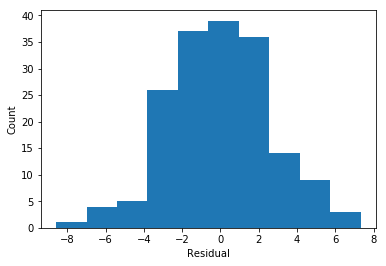

In [33]:
plt.hist(rolb['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

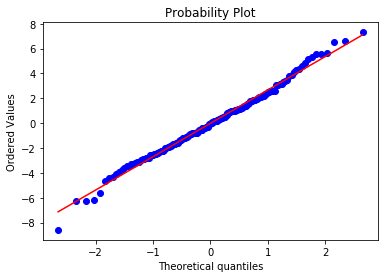

In [34]:
stats.probplot(rolb['Residual'], plot=plt)
plt.show()
#The residuals Look very evenly distributed.  Let's check for leverage points as well

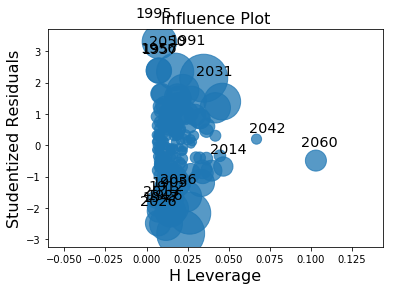

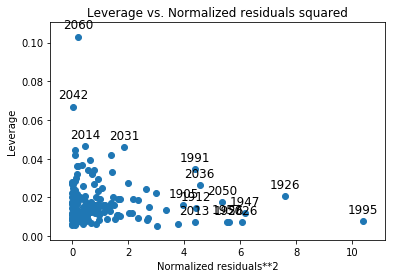

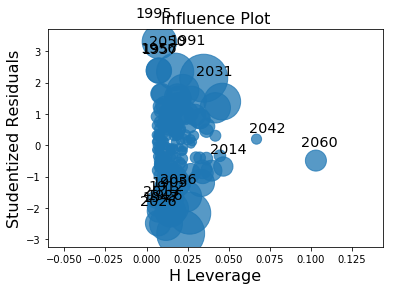

In [35]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(ROLB)
influence_plot(ROLB)
#It looks like there aren't any outlier leverage points to eliminate.  There are some points with some leverage but not high 
# residuals and high residual points with low leverage so we won't remove anything from the data at this time

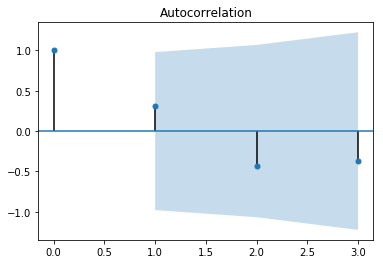

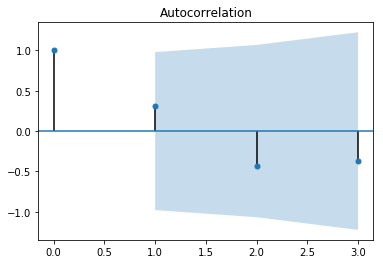

In [36]:
rolbcorr1 = rolb[['Overall Rating', 'Awareness', 'Pursuit', 'Tackle']].corr()
plot_acf(rolbcorr1['Overall Rating'])
#Everything appears to be in the range that tells us there is not a significant amount of autocorrelation present.
#There is also a durbin watson stat of 1.711 which tells us there is not a significant amount of autocorrelation

In [37]:
##Finally, lets do a Breush Pagan test to check for homoskedasticity
het_breuschpagan(rolb['Residual'], rolbsig1)
#Because of the very low p-value in the 2nd row, we can reject the null that there is heteroskedasticity

(51.769113308647,
 5.7342929813057e-12,
 24.14152051472954,
 4.466002642427206e-13)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(rolbsig1, rolb['Overall Rating'], test_size = 0.3, random_state=42)

In [39]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

In [41]:
rolbcv = cross_val_score(reg, rolbsig1, rolb['Overall Rating'], cv=5)

In [42]:
rolbcv_mean = np.mean(rolbcv)

In [43]:
print(rolbcv, rolbcv_mean)
#Our model avareged a score of 86.8%.

[0.92770781 0.83844922 0.93848078 0.81669159 0.82008089] 0.868282056792359


In [46]:
rolbdesc = rolb[['Overall Rating', 'Awareness', 'Tackle', 'Predicted Value', 'Residual']]
rolbdesc1 = rolbdesc.describe()
rolbdesc1.to_csv('C:\\Users\\tilleymusprime\\Desktop\\rolbdesc2.csv')